In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [3]:


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [4]:


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



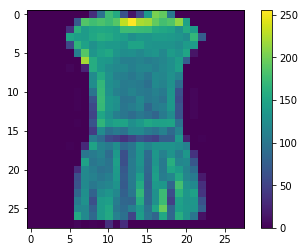

In [8]:


plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()



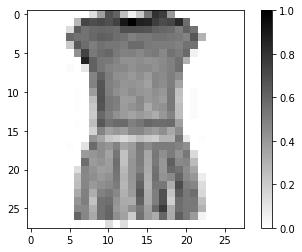

In [23]:
# Hmm so this `cmap=plt.cm.binary` kwarg displays grayscale instead of that strange purple to yellow scale.
plt.figure()
plt.imshow(train_images[3]/255.0, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


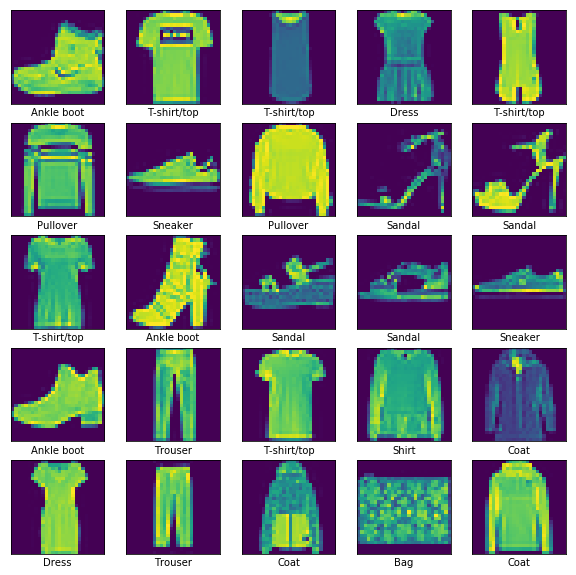

In [25]:
# This is almost like the output of a TSA luggage xray scanner 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # , cmap=plt.cm.binary
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:

train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


Instructions for updating:
Colocations handled automatically by placer.


In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
# Looking at the use of the non-scaled data first.
# Wow that looks like terrible accuracy.
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 14.5146 - acc: 0.0995
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 13.7328 - acc: 0.1479
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 13.0450 - acc: 0.1906
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 13.0474 - acc: 0.1905
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9979 - acc: 0.1936


In [30]:
# Yea if that is out of 1.0 then this 0.1917 is pretty low
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 13.0283 - acc: 0.1917
Test accuracy: 0.1917


In [32]:
# Try on that scaled data now ..
# Okay this looks better. more like the result in the tutorial.
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5902 - acc: 0.8182
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3900 - acc: 0.8622
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3526 - acc: 0.8739
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3319 - acc: 0.8788
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3141 - acc: 0.8858


In [34]:
model.input_shape, model.output_shape

((None, 28, 28), (None, 10))

In [35]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>]

In [37]:
test_loss, test_acc = model.evaluate(test_images_scaled, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 34us/sample - loss: 0.3489 - acc: 0.8740
Test accuracy: 0.874


In [38]:
predictions = model.predict(test_images_scaled)

In [39]:
predictions[0], test_labels[0]

(array([1.3787793e-05, 5.9650089e-09, 1.9482790e-07, 1.8630770e-09,
        3.6141572e-07, 3.6579393e-02, 1.0138750e-05, 1.5758899e-01,
        1.9775856e-04, 8.0560941e-01], dtype=float32), 9)

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


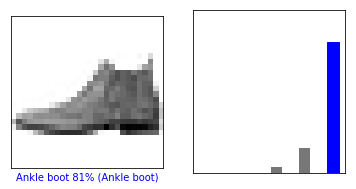

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


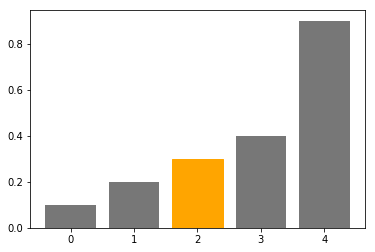

In [44]:
thisplot = plt.bar(range(5), [.1, .2, .3, .4, .9], color="#777777")
thisplot[2].set_color('orange')

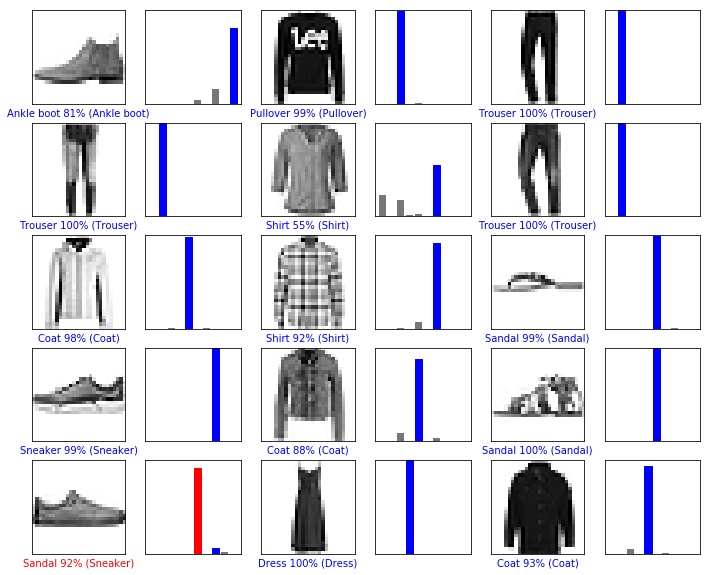

In [45]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


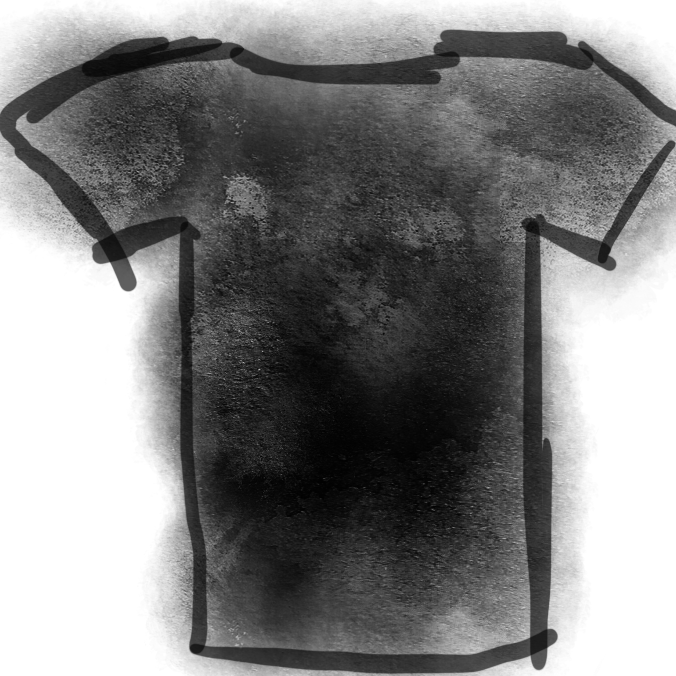

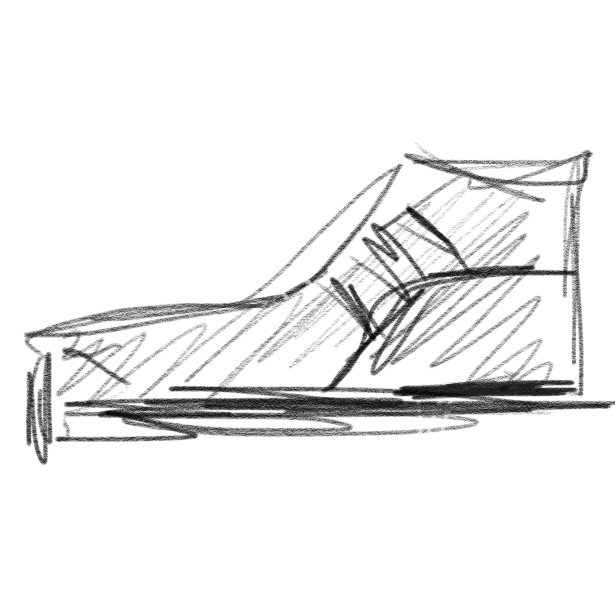

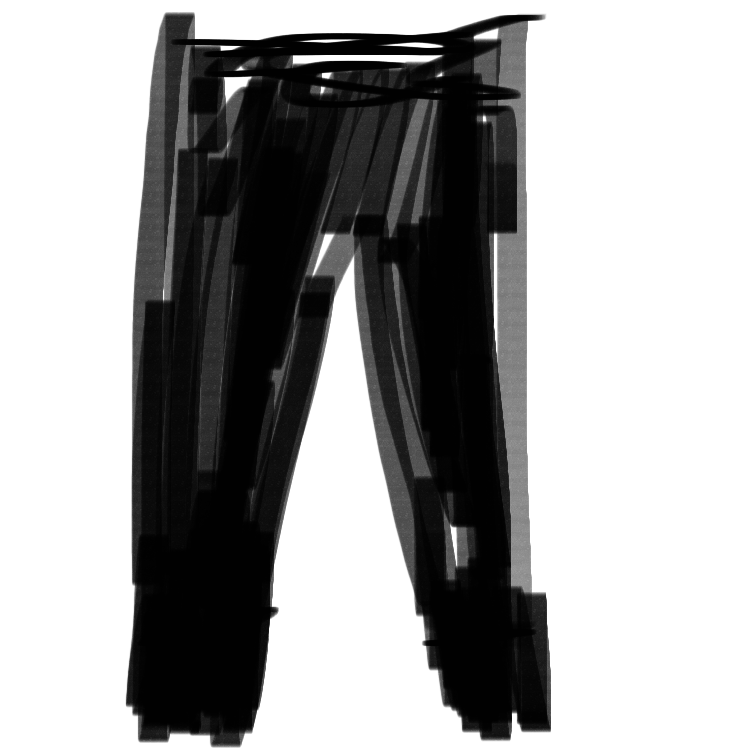

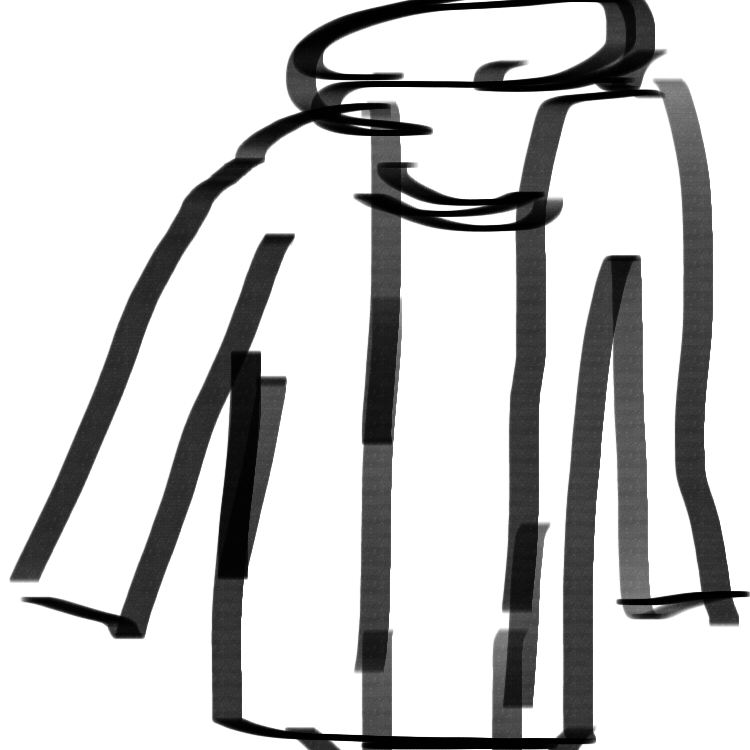

[None, None, None, None]

In [48]:
# For fun, I want to try and run the model on my own hand drawn images.
# Raw im
import IPython.display as ipd # import Image

# These four pngs were created w/ Adobe sketchbook
# Then I manually cropped them with macOS Preview to make sure they are squares.

[ipd.display(ipd.Image(filename=fn))
    for fn in [
        'keras-fashion-helloworld/myimages-originals/' + x
        for x in ['2019-05-13 14.29.04--8.png',
                 '2019-05-13 14.30.20.png',
                 '2019-05-13 14.31.18.png',
                 '2019-05-13 14.32.27.png']
    ]]
# ipd.Image(filename='keras-fashion-helloworld/myimages-originals/2019-05-13 14.29.04--8.png')





In [49]:
# with the help of PIL, obtained with `pip install Pillow`
from PIL import Image

def extract_vec(img):
    # re-scale to 28x28 in place
    img.thumbnail((28, 28), Image.ANTIALIAS)
    
    values = list(img.getdata())
    
    pixels = np.array([x[0] for x in values])
    
    return np.resize(pixels, (28, 28))
    
    
    

In [ ]:
# quick example of first image, 